In [1]:
import re
import string
from numpy.random import choice
import random

"""READ FILE IN TO PLAY"""

with open('extra.txt', 'r') as seuss_script:
    # open txt file and read to string, string to lower
    seussical = seuss_script.read()
    seussical = seussical.lower()

# use regex to split text into words and punctuation, including contracted words
seuss_string = re.findall(r"[.,]|[a-z]+[']?[a-z]+", seussical)

"""CREATE OUR NESTED DICT TO SAVE HOW OFTEN ONE WORD FOLLOWS ANOTHER"""

seuss_dict = {}
# for loop that runs over every word in our string, but stating to stop at the last word
for i, word in enumerate(seuss_string[:-1]):
    # setting this word to be the word right after the one we were on
    this_word = seuss_string[i - 1]
    # if this_word isnt in our dictionary already...
    if this_word not in seuss_dict:
        # start our counter dict
        next_count = {}
        # add our new word to be a key in our seuss dict and the count dict to be its value
        seuss_dict[this_word] = next_count
    # if it is already in there....
    else:
        # create empty dictionary with this_word as the key and next_count as the value
        next_count = seuss_dict[this_word]
    # if the next word(word) is in our nested dict already...
    if word in next_count:
        # add one to its count
        next_count[word] += 1
    # if its not already in there
    else:
        # lets add it and set its count to 1
        next_count[word] = 1

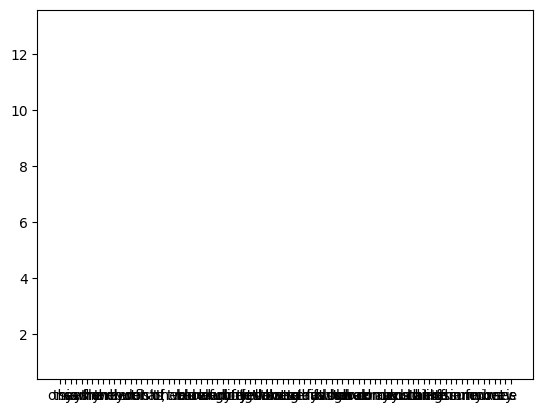

In [102]:
import seaborn as sns
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

x = []
y = [i for i in range(11)]

# z = []

for k, v in seuss_dict.items():
    x = v
    for key, value in v.items():
        plt.plot(key, value, label = k)
        # print(value)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import json

# df = pd.DataFrame(seuss_dict)
# df.fillna(0, inplace=True)
# print(df)

d = {}
for k, v in seuss_dict.items():
    d.update({k: v})
    # for k, value in v.items():
# print(d)


# df = pd.DataFrame.from_dict(d,orient="index").T


# plt.figure(figsize=(15, 5))
# xlabels = list(d.keys())

# for i, k in d.items():
#     for key, value in k.items():

#         plt.scatter([i]*len(d), d[k], c="#396B8B")

# plt.xticks(list(range(1, len(xlabels)+1)), xlabels, rotation='horizontal')
# plt.grid(axis="y")
# plt.title("Molecular Weight by Sequence ID")
# plt.ylabel("Molecular Weight")
# plt.show()
d = {}
for k, v in seuss_dict.items():

    
# print(d)

    row_tups = []
    for key, value in v.items():
        row_tups.append((key, value))
    row_tups.sort(key=lambda tup: tup[1], reverse=True)
    # print(row_tups)
    d.update({k: row_tups})
print(d)
# d = d.T
# df = pd.DataFrame.from_dict(d,orient="index")

# df.to_csv("fish_table.csv", index=False)
    


In [61]:
import itertools
import matplotlib.pyplot as plt




# Flatten keys list

# Produces y = ['4026', '4024', '1940', '2912', '2916, '3139', '2464',...]
# y = [val for subl in d.values() for val in subl]

# ax.plot(x, y, 'ro')
# plt.show()


['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', 'one', 'one', 'one', 'fish', 'fish', 'fish', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', 'two', 'two', 'red', 'red', 'blue', 'blue', 'black', 'old', 'old', 'new', 'new', 'this', 'has', 'has', 'has', 'littlecar', 'little', 'star', 'say', 'say', 'what', 'lot', 'of', 'of', 'of', 'there', 'there', 'there', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'yes', 'some', 'some', 'some', 'and', 'and', 'and', 'sad', 'sad', 'glad', 'glad', 'very', 'very', 'bad', 'bad', 'why', 'why', 'they', 'they', 'they', 'they', 'do', 'do', 'not', 'not', 'know', 'go', 'go', 'go', 'ask', 'ask', 'your', 'your', 'dad', 'thin', 'fat', 'fat', 'the', 'the', 'yellow', 'hat', 'from', 'from', 'from', 'to', 'to', 'to', 'here', 'here', 'here', 'funny', 'things', 'things', 'everywhere', 'who', 'like', 'like', 'run', 'run', 'for', 'fun', 'in', 'hot